In [1]:
import numpy as np
import pandas as pd
import sys
import os

classes_path = os.path.abspath(r"D:\Repositories\PhD\src\classes")
src_path = os.path.abspath(r"D:\Repositories\PhD\src\functions")
sys.path.append(src_path)
sys.path.append(classes_path)
print(sys.path)

['d:\\Repositories\\PhD\\notebooks\\automated_processing', 'd:\\Anaconda\\envs\\ai-env-torch\\python310.zip', 'd:\\Anaconda\\envs\\ai-env-torch\\DLLs', 'd:\\Anaconda\\envs\\ai-env-torch\\lib', 'd:\\Anaconda\\envs\\ai-env-torch', '', 'd:\\Anaconda\\envs\\ai-env-torch\\lib\\site-packages', 'd:\\Anaconda\\envs\\ai-env-torch\\lib\\site-packages\\win32', 'd:\\Anaconda\\envs\\ai-env-torch\\lib\\site-packages\\win32\\lib', 'd:\\Anaconda\\envs\\ai-env-torch\\lib\\site-packages\\Pythonwin', 'D:\\Repositories\\PhD\\src\\functions', 'D:\\Repositories\\PhD\\src\\classes']


In [2]:
import agentic_processing

In [3]:
import importlib

In [4]:
importlib.reload(agentic_processing)

<module 'agentic_processing' from 'D:\\Repositories\\PhD\\src\\classes\\agentic_processing.py'>

In [5]:
import optuna

In [8]:
df = pd.read_csv(r"D:\Repositories\PhD\parsed_data\ICE_data\internal_combustion_engine_bearings_fixed_duplicates.csv")
df

,Time,Demand 1,Control 1,Output Drive 1,Channel 1,Channel 2,Channel 3,Channel 4,Channel 1 Kurtosis,Channel 2 Kurtosis,...,Rear Input 5,Rear Input 6,Rear Input 7,Rear Input 8,FAULT,RPM,HUMIDITY%,TEMPERATURE_Celsius,resultant_vibration_magnitude,resultant_vibration_magnitude_normal_dist
0,0.001450,0.125011,0.176033,0.000000,0.211458,0.209182,0.145823,1.624200e-15,2.52457,2.94874,...,0,0,0,0,1,1000,0,-10,0.331264,-1.104839
1,0.006283,0.125011,0.176033,0.000012,0.206329,0.206513,0.150478,1.643320e-15,2.32290,2.46553,...,0,0,0,0,1,1000,0,-10,0.328425,-1.113447
2,0.009633,0.125011,0.172626,0.000013,0.206351,0.194663,0.148313,1.528270e-15,2.26458,2.55488,...,0,0,0,0,1,1000,0,-10,0.320111,-1.139087
3,0.013200,0.125011,0.172626,0.000014,0.214463,0.214489,0.155652,1.791370e-15,2.53380,2.66379,...,0,0,0,0,1,1000,0,-10,0.340921,-1.076103
4,0.016583,0.125011,0.172626,0.000015,0.210449,0.198857,0.154162,1.594310e-15,2.51443,2.81510,...,0,0,0,0,1,1000,0,-10,0.328023,-1.114673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390057,27.302300,0.500044,0.515140,0.043543,0.554265,0.560519,1.633510,1.712510e-15,3.10602,3.09644,...,0,0,0,0,0,2000,50,45,1.813766,0.595405
390058,27.305700,0.500044,0.515140,0.043541,0.554672,0.560996,1.646360,1.711110e-15,3.10423,3.09293,...,0,0,0,0,0,2000,50,45,1.825617,0.601918
390059,27.309200,0.500044,0.515140,0.043536,0.555249,0.561109,1.645410,1.710140e-15,3.11372,3.09118,...,0,0,0,0,0,2000,50,45,1.824971,0.601564
390060,27.312500,0.500044,0.515305,0.043532,0.555029,0.560672,1.640060,1.711640e-15,3.11269,3.09097,...,0,0,0,0,0,2000,50,45,1.819947,0.598807


In [9]:
c1 = df['Channel 1']
c2 = df['Channel 2']
c3 = df['Channel 3']

In [10]:
signals = [c1, c2, c3]

In [35]:
study = optuna.create_study(direction="minimize")
study.optimize(lambda t: objective(t, signals=signals, fs=3200), n_trials=300)
best_cfg = study.best_params  # -> reconstruct steps from params

[I 2025-10-20 13:04:16,879] A new study created in memory with name: no-name-5b3432a3-ed86-47a6-9c62-6700a20ca14f
D:\Repositories\PhD\src\classes\agentic_processing.py:44: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  pvals = acorr_ljungbox(x, lags=lags, return_df=True)['lb_pvalue'].values
D:\Repositories\PhD\src\classes\agentic_processing.py:44: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  pvals = acorr_ljungbox(x, lags=lags, return_df=True)['lb_pvalue'].values
[I 2025-10-20 13:04:34,598] Trial 0 finished with value: 50125.26647580791 and parameters: {'n_steps': 2, 'step0': 'detrend_linear', 'step1': 'quantile', 'qt_out1': 'uniform', 'qt_frac1': 0.3905341714902599, 'qt_sub1': 80000}. Best is trial 0 with value: 50125.26647580791.
D:\Repositor

In [36]:
best_cfg

{'n_steps': 2,
 'step0': 'robust_scaler',
 'rs_qlo0': 16.75491076805854,
 'rs_qhi0': 70.4723507642886,
 'rs_ctr0': False,
 'rs_scl0': True,
 'step1': 'highpass',
 'hp_fc1': 1134.0088337071122,
 'hp_ord1': 3}

In [16]:
import agentic_data_transforms

In [19]:
study.best_params

{'n_steps': 2,
 'step0': 'quantile',
 'qt_out0': 'normal',
 'qt_frac0': 0.6462674837691263,
 'qt_sub0': 190000,
 'step1': 'maxabs'}

In [27]:
study.set_user_attr("steps_config", best_cfg)

In [37]:
study.best_trial.user_attrs

{'steps_config': [{'name': 'robust_scaler',
   'params': {'quantile_range': (16.75491076805854, 70.4723507642886),
    'with_centering': False,
    'with_scaling': True}},
  {'name': 'highpass', 'params': {'fc': 1134.0088337071122, 'order': 3}}]}

In [38]:
best_steps = study.best_trial.user_attrs["steps_config"]

In [39]:
best_steps

[{'name': 'robust_scaler',
  'params': {'quantile_range': (16.75491076805854, 70.4723507642886),
   'with_centering': False,
   'with_scaling': True}},
 {'name': 'highpass', 'params': {'fc': 1134.0088337071122, 'order': 3}}]

In [42]:
importlib.reload(agentic_data_transforms)

<module 'agentic_data_transforms' from 'D:\\Repositories\\PhD\\src\\classes\\agentic_data_transforms.py'>

In [43]:
fitted_steps = agentic_data_transforms.fit_pipeline(best_steps, fs = 3200, train_signals=signals)

In [44]:
fitted_steps

[FittedStep(name='robust_scaler', params={'quantile_range': (16.75491076805854, 70.4723507642886), 'with_centering': False, 'with_scaling': True}, transformer=RobustScaler(quantile_range=(16.75491076805854, 70.4723507642886),
              with_centering=False)),
 FittedStep(name='highpass', params={'fc': 1134.0088337071122, 'order': 3}, transformer=None)]

In [45]:
y_val = agentic_data_transforms.transform_with_fitted(fitted_steps, c1, fs = 3200)

In [47]:
import matplotlib.pyplot as plt

(array([3.10000e+01, 1.44000e+02, 3.83000e+02, 1.16900e+03, 3.84596e+05,
        2.87500e+03, 5.41000e+02, 2.49000e+02, 6.60000e+01, 8.00000e+00]),
 array([-0.39271065, -0.30964245, -0.22657425, -0.14350605, -0.06043784,
         0.02263036,  0.10569856,  0.18876676,  0.27183497,  0.35490317,
         0.43797137]),
 <BarContainer object of 10 artists>)

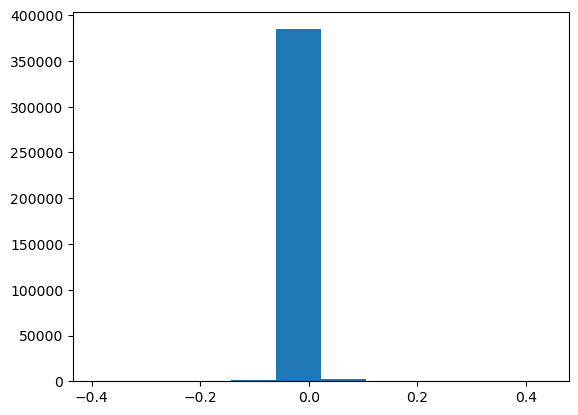

In [48]:
plt.hist(y_val)

# Final Test

In [49]:
importlib.reload(agentic_processing)

<module 'agentic_processing' from 'D:\\Repositories\\PhD\\src\\classes\\agentic_processing.py'>

In [11]:
import optuna
from typing import List
from agentic_processing import sample_steps, PipelineExecutor, default_objective

train_signals = [c1]#, c2, c3]

def objective_fn(trial, signals: List[np.ndarray], fs: float) -> float:
    steps = sample_steps(trial, fs=fs, max_steps=4)
    trial.set_user_attr("steps_config", steps)
    # Fit pipeline on training subset (no leakage)
    pe = PipelineExecutor(steps_config=steps, fs=fs).fit(train_signals=signals)
    ys = pe.transform_batch(signals)
    obj = default_objective()
    return obj.evaluate_signals(ys, xs0=signals)

study = optuna.create_study(direction="minimize")
study.optimize(lambda t: objective_fn(t, signals=train_signals, fs=3200), n_trials=300)

best_steps = study.best_trial.user_attrs["steps_config"]
pe = PipelineExecutor(best_steps, fs=3200).fit(train_signals=train_signals)
y_new = pe.transform(train_signals[0])
pe.save("best_preproc.joblib")
pe2 = PipelineExecutor.load("best_preproc.joblib")

[I 2025-10-21 08:52:56,805] A new study created in memory with name: no-name-8d324a82-a566-48cf-8777-e9e90d8b504c
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\distributions.py:518: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (0.0, 1.0) which is of type tuple.
  warnings.warn(message)
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\distributions.py:518: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (-1.0, 1.0) which is of type tuple.
  warnings.warn(message)
D:\Repositories\PhD\src\classes\agentic_processing.py:150: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  _, p, _, _ = kpss(y, regression=self.regression, nlags="auto")
[W 2025-10-21 08:53:01,325] Trial 0 fail

KeyboardInterrupt: 

In [63]:
best_steps

[{'name': 'savgol', 'params': {'win': 143, 'poly': 2}},
 {'name': 'quantile',
  'params': {'output_distribution': 'normal',
   'nq_frac': 0.8721687151392028,
   'subsample': 40000,
   'random_state': 0}}]

(array([1.20000e+01, 3.09000e+02, 7.11800e+03, 5.11440e+04, 1.34442e+05,
        1.38347e+05, 5.08900e+04, 7.41600e+03, 3.72000e+02, 1.20000e+01]),
 array([-5.19933758e+00, -4.15947007e+00, -3.11960255e+00, -2.07973503e+00,
        -1.03986752e+00,  4.89217555e-11,  1.03986752e+00,  2.07973503e+00,
         3.11960255e+00,  4.15947007e+00,  5.19933758e+00]),
 <BarContainer object of 10 artists>)

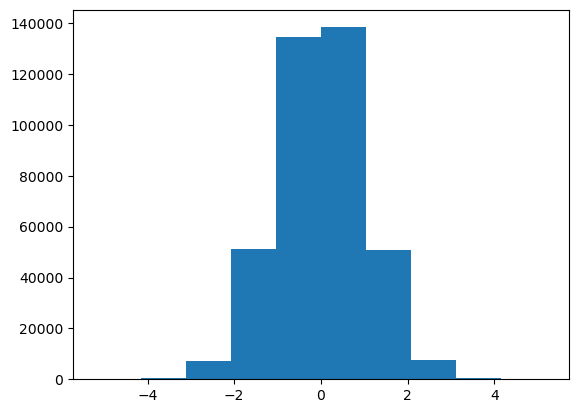

In [64]:
plt.hist(y_new)